<a href="https://colab.research.google.com/github/AviralTripathim22ma012/CV-2/blob/main/homography_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homography matrix**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
%matplotlib inline

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

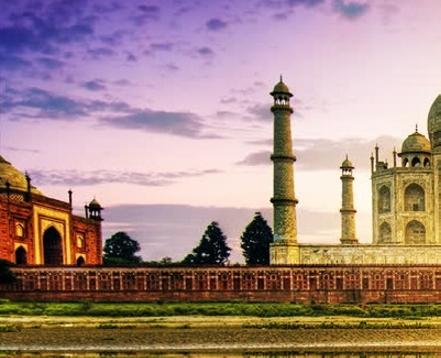

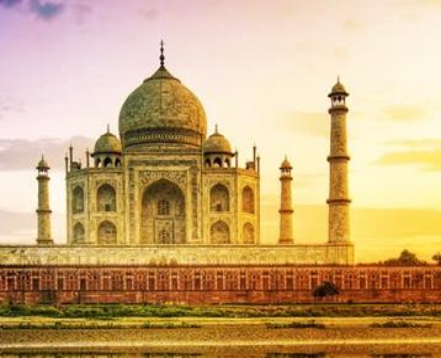

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

'''# Load the two images'''
image1 = cv2.imread('/content/1a.jpeg')
image2 = cv2.imread('/content/1b.jpeg')

'''# Get the dimensions of the two images'''
height1, width1, _ = image1.shape
height2, width2, _ = image2.shape

'''# If the two images have different sizes, resize them'''
if height1 != height2 or width1 != width2:
    # Compute the target size based on the larger of the two images
    target_height = max(height1, height2)
    target_width = max(width1, width2)

    # Resize the first image
    image1_resized = cv2.resize(image1, (target_width, target_height))

    # Resize the second image
    image2_resized = cv2.resize(image2, (target_width, target_height))

else:
    # The two images have the same size, no need to resize
    image1_resized = image1
    image2_resized = image2

'''# Display the two resized images'''
cv2_imshow(image1_resized)
cv2_imshow(image2_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15
zoom_x1 = 300; zoom_x2 = 1300
zoom_y1 = 300; zoom_y2 = 700

imageFile1 = image1_resized #cv2.imread("/content/1a.jpeg", 0)
imageFile2 = image2_resized #cv2.imread("/content/1b.jpeg", 0)

In [ ]:
'''# Detect ORB features and compute descriptors.'''
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(imageFile1, None)
keypoints2, descriptors2 = orb.detectAndCompute(imageFile2, None)

In [ ]:
im1Keypoints = np.array([])
im2Keypoints = np.array([])
im1Keypoints = cv2.drawKeypoints(imageFile1, keypoints1, im1Keypoints, color=(0,0,255),flags=0)
im2Keypoints = cv2.drawKeypoints(imageFile2, keypoints2, im2Keypoints, color=(0,0,255),flags=0)
print("Saving Image with Keypoints")
cv2.imwrite("keypoints1.jpg", im1Keypoints)
cv2.imwrite("keypoints2.jpg", im2Keypoints)

Saving Image with Keypoints


True

Text(0.5, 1.0, 'Keypoints obtained from the ORB detector')

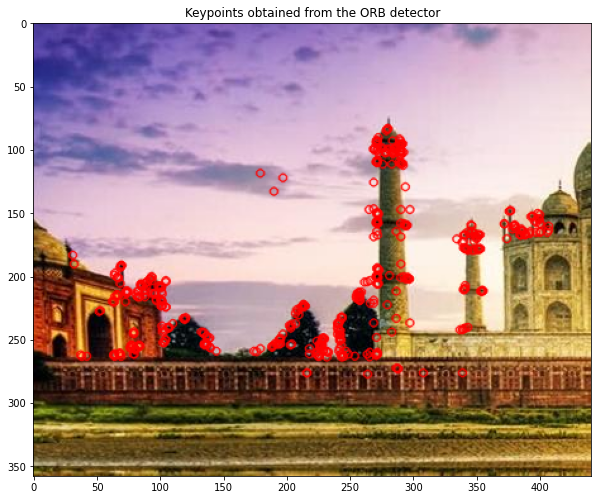

In [ ]:
plt.imshow(im1Keypoints[:,:,::-1])
plt.title("Keypoints obtained from the ORB detector")

Text(0.5, 1.0, 'Keypoints obtained from the ORB detector')

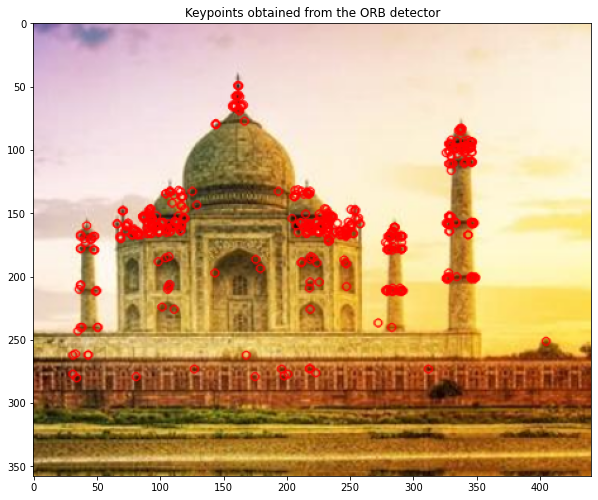

In [ ]:
plt.imshow(im2Keypoints[:,:,::-1])
plt.title("Keypoints obtained from the ORB detector")

In [ ]:
'''# Match features.'''
matcher = cv2.DescriptorMatcher_create(
                cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

'''# Sort matches by score'''
matches = tuple(sorted(matches, key=lambda x: x.distance))

'''# Remove not so good matches'''
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

'''# Draw top matches'''
imMatches = cv2.drawMatches(imageFile1, keypoints1,
                            imageFile2, keypoints2,
                            matches, None)
cv2.imwrite("imMatches.jpg", imMatches)

True

Text(0.5, 1.0, 'Matchings obtained from the descriptor matcher')

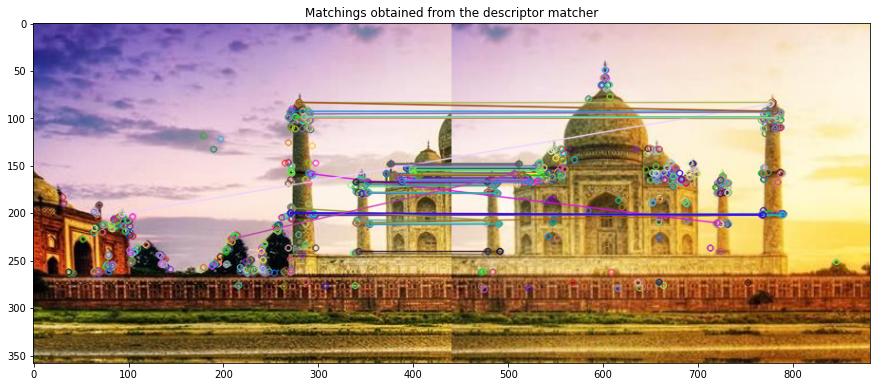

In [ ]:
plt.figure(figsize=[15,10])
plt.imshow(imMatches[:,:,::-1])
plt.title("Matchings obtained from the descriptor matcher")

Text(0.5, 1.0, 'Matchings obtained from the descriptor matcher')

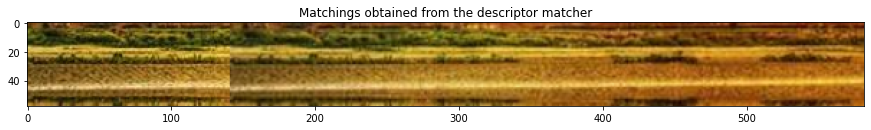

In [ ]:
plt.figure(figsize=[15,10])
imMatches_zoom = imMatches[zoom_y1:zoom_y2,zoom_x1:zoom_x2]
plt.imshow(imMatches_zoom[:,:,::-1])
plt.title("Matchings obtained from the descriptor matcher")

In [ ]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print("Homograhy matrix \n{}".format(h))

Homograhy matrix 
[[ 1.22097283e+00  3.26972035e-02  2.97568405e+02]
 [ 5.34620177e-02  1.03895043e+00 -5.08256918e+00]
 [ 3.22508898e-04  6.26545885e-05  1.00000000e+00]]
